In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.python.keras.models import Sequential,Model
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.python.keras.layers import Dense,Embedding,Flatten,Input,Concatenate, Reshape, Dropout,merge,Activation,LSTM,GRU,SimpleRNN,Conv1D, MaxPooling1D, Flatten
from tensorflow.python.keras.layers import merge
import pandas as pd
import numpy as np

from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#! pip install categorical_embedder
#import categorical_embedder as ce

# Model Building 

# (1)Neural Network

In [2]:
df = pd.read_csv('data_prep_bin_traffic.csv')

In [3]:
exp1 = df.copy()
exp1 = exp1.drop(columns=['holiday','weather_main','weather_description','date_time'])
exp1.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend,weather_desc,weather_bin,snow_bin,holi
0,15.13,0.0,0.0,40.0,5545.0,1,0,1,1,0,0
1,16.21,0.0,0.0,75.0,4516.0,1,0,1,1,0,0
2,16.43,0.0,0.0,90.0,4767.0,1,0,1,1,0,0
3,16.98,0.0,0.0,90.0,5026.0,1,0,1,1,0,0
4,17.99,0.0,0.0,75.0,4918.0,1,0,1,1,0,0


In [4]:
exp1.dtypes

temp              float64
rain_1h           float64
snow_1h           float64
clouds_all        float64
traffic_volume    float64
Day_Week            int64
Weekend             int64
weather_desc        int64
weather_bin         int64
snow_bin            int64
holi                int64
dtype: object

In [5]:
# Create an instance of MinMaxScaler with a feature range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the data using the MinMaxScaler
expe1 = scaler.fit_transform(exp1)

expe1 = pd.DataFrame(expe1, columns=exp1.columns, index=exp1.index)
expe1.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,Day_Week,Weekend,weather_desc,weather_bin,snow_bin,holi
0,0.673215,0.0,0.0,0.40,0.761676,0.166667,0.0,0.125,1.0,0.0,0.0
1,0.689412,0.0,0.0,0.75,0.620330,0.166667,0.0,0.125,1.0,0.0,0.0
2,0.692711,0.0,0.0,0.90,0.654808,0.166667,0.0,0.125,1.0,0.0,0.0
3,0.700960,0.0,0.0,0.90,0.690385,0.166667,0.0,0.125,1.0,0.0,0.0
4,0.716107,0.0,0.0,0.75,0.675549,0.166667,0.0,0.125,1.0,0.0,0.0


In [6]:
X_1 = expe1[['temp', 'rain_1h', 'snow_bin', 'clouds_all', 'Day_Week', 'Weekend', 'weather_desc', 'holi']]
y_1 = expe1['traffic_volume']

# Define the indices for splitting the data
split_index = int(0.7 * len(X_1))  # 70% for training, 30% for testing
print(split_index)
# Split the features and target variables accordingly
X_train_1, X_test_1 = X_1[:split_index], X_1[split_index:]
y_train_1, y_test_1 = y_1[:split_index], y_1[split_index:]

31292


In [7]:
# Building the neural network model
model_exp1 = Sequential()

# Adding layers to the model
model_exp1.add(Dense(12, input_dim=X_train_1.shape[1], kernel_initializer='normal', use_bias=True, activation='relu'))
model_exp1.add(Dense(12, activation='relu', use_bias=True))
model_exp1.add(Dense(12, activation='relu', use_bias=True))
model_exp1.add(Dense(12, activation='relu',use_bias=True))
model_exp1.add(Dropout(0.2))
model_exp1.add(Dense(1, activation='sigmoid'))

# Display model summary
model_exp1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 589
Trainable params: 589
Non-trainable params: 0
__________________________________________________________

In [8]:
# Compile the model for training
model_exp1.compile(loss='mse', optimizer='adam', metrics=['mse'])

# Train the model using the training data (X_train_1, y_train_1)
# Validation data (X_test_1, y_test_1) is used for evaluating the model's performance during training
# EarlyStopping callback monitors the validation loss and stops training if there's no improvement after a certain number of epochs (patience=10)
history_exp1 = model_exp1.fit(X_train_1, y_train_1, epochs=50, batch_size=100, validation_data=(X_test_1, y_test_1), 
                              callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)


Epoch 1/50
313/313 [==============================] - 1s 2ms/step - loss: 0.0709 - mse: 0.0709 - val_loss: 0.0695 - val_mse: 0.0695
Epoch 2/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0689 - val_mse: 0.0689
Epoch 3/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0683 - mse: 0.0683 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 4/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0682 - mse: 0.0682 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 5/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0681 - mse: 0.0681 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 6/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0681 - mse: 0.0681 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 7/50
313/313 [==============================] - 0s 1ms/step - loss: 0.0680 - mse: 0.0680 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 8/50
313/313 [==============================] - 0s 1ms/step - loss: 0.

# (2) Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the Random Forest regressor
rf_regressor = RandomForestRegressor()

# Define a smaller hyperparameters grid for tuning
param_dist = {
    'n_estimators': [100, 200],  # Fewer values for number of trees
    'max_depth': [None, 10],  # Fewer values for maximum depth
    'min_samples_split': [2, 5],  # Fewer values for minimum samples split
    'min_samples_leaf': [1, 2]  # Fewer values for minimum samples leaf
}

# Initialize RandomizedSearchCV for hyperparameter tuning with n_iter=4
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=4,
                                   cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)

# Perform RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train_1, y_train_1)

# Get the best hyperparameters found by RandomizedSearchCV
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 10}


In [10]:
# Train the Random Forest model using the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)
best_rf_regressor.fit(X_train_1, y_train_1)

# Generate predictions using the trained Random Forest model
y_pred_rf_best = best_rf_regressor.predict(X_test_1)

# (3) Support Vector Machine

In [11]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
# Define a smaller parameter grid for randomized search
param_grid = {'C': [0.1, 1],
              'gamma': [0.01, 0.1]}

# Initialize the Support Vector Machine regressor with RBF kernel
svm_regressor = SVR(kernel='rbf')

# Perform randomized search to find the best hyperparameters
random_search = RandomizedSearchCV(svm_regressor, param_distributions=param_grid, n_iter=4,
                                   cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

random_search.fit(X_train_1, y_train_1)

# Get the best SVM regressor from randomized search
best_svm_regressor = random_search.best_estimator_

print(best_svm_regressor)


SVR(C=1, gamma=0.1)


In [12]:
#Train the best SVM regressor
best_svm_regressor.fit(X_train_1, y_train_1)

# Generate predictions using the best SVM regressor
y_pred_best_svm = best_svm_regressor.predict(X_test_1)



# (4) XGBoost

In [13]:
#!pip install xgboost

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
# Define the XGBoost regressor with default parameters
xgb_model = XGBRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV with TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=3)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_absolute_error', verbose=1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_1, y_train_1)

# Get the best estimator from the grid search
best_xgb_model = grid_search.best_estimator_

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}


In [14]:
# Make predictions on the test data
y_pred_1 = best_xgb_model.predict(X_test_1)

# Evaluate the model using metrics such as MAE and RMSE
mae = mean_absolute_error(y_test_1, y_pred_1)
rmse = np.sqrt(mean_squared_error(y_test_1, y_pred_1))


print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 0.21547216725539722
Root Mean Squared Error: 0.2503952006128793


# (5) LightGBM

In [15]:
#!pip install lightgbm

from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

# Define the LightGBM regressor with default parameters
lgbm_model = LGBMRegressor()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize GridSearchCV with TimeSeriesSplit for cross-validation
tscv = TimeSeriesSplit(n_splits=3)
grid_search = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_absolute_error', verbose=1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_1, y_train_1)

# Get the best estimator from the grid search
best_lgbm_model = grid_search.best_estimator_

print(f"Best Parameters: {grid_search.best_params_}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 415
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 7
[LightGBM] [Info] Start training from score 0.452730
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 15646, number of used features: 7
[LightGBM] [Info] Start training from score 0.446450
[LightGBM] [Info] Auto-choosing row-wise multi-threading

In [16]:
# Make predictions on the test data
y_pred_1 = best_lgbm_model.predict(X_test_1)


# Models Evaluation

# Evaluation Matrics -> MAE/ MSE/ RMSE/ R2/ r2_adjusted/ MAPE

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_regression_model(model, X_test, y_test):
        """
        Evaluate a regression model using Mean Absolute Error (MAE), Mean Squared Error (MSE),
        Root Mean Squared Error (RMSE), R-squared (R2), R-squared adjusted (R2 adjusted),
        and Mean Absolute Percentage Error (MAPE).
    
        Parameters:
        - model: The trained regression model.
        - X_test: Input features for testing.
        - y_test: True target values for testing.
    
        Returns:
        - evaluation_dict: A dictionary containing regression metrics.
        """
    
        # Calculate predictions
        y_pred = model.predict(X_test)
    
        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, y_pred)  # MAE = mean(|y_true - y_pred|)
    
        # Calculate Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)  # MSE = mean((y_true - y_pred)^2)
        
        # Calculate Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mse)  # RMSE = sqrt(MSE)
    
        # Calculate R-squared (R2)
        r2 = r2_score(y_test, y_pred)  # R2 = 1 - (sum((y_true - y_pred)^2) / sum((y_true - mean(y_true))^2))
    
        # Calculate R-squared adjusted (R2 adjusted)
        n = len(y_test)
        k = X_test.shape[1]
        r2_adjusted = 1 - (1 - r2) * ((n - 1) / (n - k - 1))  # R2 adjusted = 1 - (1 - R2) * ((n - 1) / (n - k - 1))
    
        # Calculate Mean Absolute Percentage Error (MAPE)
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE = mean(|(y_true - y_pred) / y_true|) * 100
    
        # Round metrics to four decimal points
        mae = round(mae, 4)
        mse = round(mse, 4)
        rmse = round(rmse, 4)
        r2 = round(r2, 4)
        r2_adjusted = round(r2_adjusted, 4)
        mape = round(mape, 4)
    
        evaluation_dict = {
            'Mean Absolute Error': mae,
            'Mean Squared Error': mse,
            'Root Mean Squared Error': rmse,
            'R-squared': r2,
            'R-squared adjusted': r2_adjusted,
            'Mean Absolute Percentage Error': mape
        }
        return evaluation_dict


In [18]:
"""
Neural Network 
"""
ypred1 = model_exp1.predict(X_test_1)
# Evaluate the neural network model
# evaluation_nn = evaluate_regression_model(model_exp1, X_test_1, y_test_1)
# print("Evaluation Metrics (Neural Network):")
# evaluation_nn

# Calculate evaluation metrics
mae = mean_absolute_error(y_test_1, ypred1)
mse = mean_squared_error(y_test_1, ypred1)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_1, ypred1)

# Calculate R-squared adjusted (R2 adjusted)
n = len(y_test_1)
k = X_test_1.shape[1]
r2_adjusted = 1 - (1 - r2) * ((n - 1) / (n - k - 1))

# Store evaluation metrics in a dictionary
evaluation_nn = {
    'Mean Absolute Error': mae,
    'Mean Squared Error': mse,
    'Root Mean Squared Error': rmse,
    'R-squared': r2,
    'R-squared adjusted': r2_adjusted
}

print("Evaluation Metrics (Neural Network):")
evaluation_nn

Evaluation Metrics (Neural Network):


{'Mean Absolute Error': 0.22893394248807997,
 'Mean Squared Error': 0.06856376343973883,
 'Root Mean Squared Error': 0.2618468320215825,
 'R-squared': 0.07312442136289199,
 'R-squared adjusted': 0.0725711866669958}

In [19]:
"""
Random Forest
"""
# Evaluate the Random Forest regressor
evaluation_rf = evaluate_regression_model(best_rf_regressor, X_test_1, y_test_1)
print("Evaluation Metrics (Random Forest):")
evaluation_rf


Evaluation Metrics (Random Forest):


{'Mean Absolute Error': 0.2159,
 'Mean Squared Error': 0.0637,
 'Root Mean Squared Error': 0.2523,
 'R-squared': 0.1393,
 'R-squared adjusted': 0.1388,
 'Mean Absolute Percentage Error': 149.7182}

In [20]:
"""
Support Vector Machine
"""

# Evaluate the SVM regressor
evaluation_svm = evaluate_regression_model(best_svm_regressor, X_test_1, y_test_1)
print("Evaluation Metrics (SVM):")
evaluation_svm

Evaluation Metrics (SVM):


{'Mean Absolute Error': 0.2165,
 'Mean Squared Error': 0.0659,
 'Root Mean Squared Error': 0.2568,
 'R-squared': 0.1085,
 'R-squared adjusted': 0.108,
 'Mean Absolute Percentage Error': 159.2567}

In [21]:
"""
XGBoost
"""

# Evaluate the XGBoost regressor
evaluation_xgb = evaluate_regression_model(best_xgb_model, X_test_1, y_test_1)
print("Evaluation Metrics (XGBoost):")
evaluation_xgb

Evaluation Metrics (XGBoost):


{'Mean Absolute Error': 0.2155,
 'Mean Squared Error': 0.0627,
 'Root Mean Squared Error': 0.2504,
 'R-squared': 0.1524,
 'R-squared adjusted': 0.1519,
 'Mean Absolute Percentage Error': 148.9516}

In [22]:
"""
LightGBM
"""

# Evaluate the LightGBM regressor
evaluation_lgbm = evaluate_regression_model(best_lgbm_model, X_test_1, y_test_1)
print("Evaluation Metrics (LightGBM):")
evaluation_lgbm

Evaluation Metrics (LightGBM):


{'Mean Absolute Error': 0.2149,
 'Mean Squared Error': 0.0625,
 'Root Mean Squared Error': 0.2499,
 'R-squared': 0.1556,
 'R-squared adjusted': 0.1551,
 'Mean Absolute Percentage Error': 148.7586}

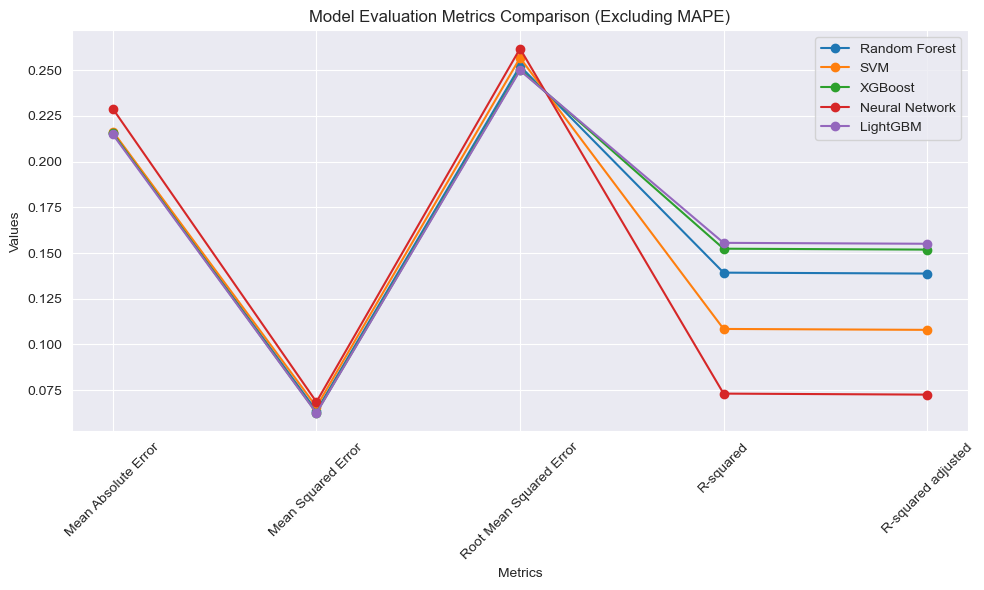

In [23]:
import matplotlib.pyplot as plt

# Assuming you have already calculated and stored evaluation metrics for each model

# Dictionary of evaluation metrics for each model
evaluation_metrics = {
    'Random Forest': evaluation_rf,
    'SVM': evaluation_svm,
    'XGBoost': evaluation_xgb,
    'Neural Network': evaluation_nn,
    'LightGBM': evaluation_lgbm
}

# Extract metric names and values for plotting (excluding MAPE)
metric_names = ['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'R-squared', 'R-squared adjusted']
models = list(evaluation_metrics.keys())
metrics_values = {model: [evaluation_metrics[model][metric] for metric in metric_names] for model in models}

# Plotting
plt.figure(figsize=(10, 6))
for model in models:
    plt.plot(metric_names, metrics_values[model], marker='o', label=model)

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Evaluation Metrics Comparison (Excluding MAPE)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Learning Curve

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a learning curve for a regression model with a continuous target variable.

    Parameters:
    - model: The regression model to plot the learning curve for.
    - X: Input features.
    - y: True target values.
    - cv: Cross-validation strategy. Default is None (5-fold cross-validation).
    - train_sizes: Array of training set sizes to use.

    Returns:
    - None. Displays the learning curve plot and text description.
    """
    train_sizes, train_scores, validation_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    validation_scores_mean = -np.mean(validation_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training error')
    plt.plot(train_sizes, validation_scores_mean, 'o-', label='Validation error')
    plt.xlabel('Training set size')
    plt.ylabel('Mean squared error')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Text description
    print("Training set sizes:", train_sizes)
    print("Mean Squared Error (Training):", train_scores_mean)
    print("Mean Squared Error (Validation):", validation_scores_mean)


In [25]:
import matplotlib.pyplot as plt

def plot_train_test_mse(history):
    """
    Plot the train vs. test Mean Squared Error (MSE) over epochs and provide a text description.

    Parameters:
    - history: The training history object from a neural network model.

    Returns:
    - None. Displays the MSE plot and text description.
    """
    plt.figure(figsize=(8, 4))
    plt.plot(history['mse'], label='Training error')
    plt.plot(history['val_mse'], label='Validation error')
    plt.title('Train vs. Validation MSE (NN) Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

    # Text description
    print("Train MSE over epochs:", history['mse'])
    print("Validation MSE over epochs:", history['val_mse'])


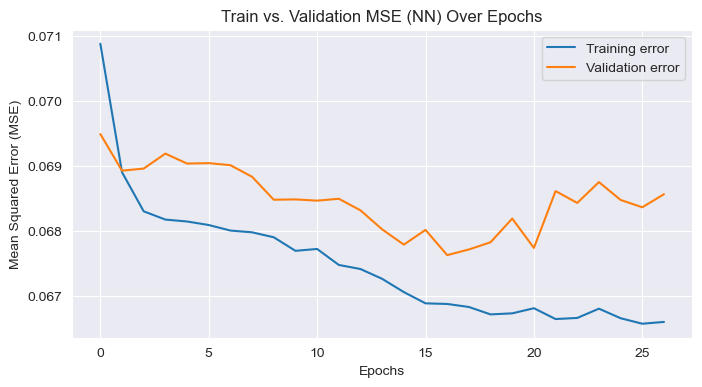

Train MSE over epochs: [0.07087966054677963, 0.06890208274126053, 0.06830014288425446, 0.068172886967659, 0.06814359128475189, 0.06808944791555405, 0.06800412386655807, 0.06797701865434647, 0.06790070980787277, 0.0676923617720604, 0.06772076338529587, 0.06747497618198395, 0.0674121081829071, 0.06726107001304626, 0.06705734878778458, 0.066883884370327, 0.06687437742948532, 0.06682799756526947, 0.06671366840600967, 0.06672992557287216, 0.06680878251791, 0.06664206087589264, 0.06665927171707153, 0.06680186837911606, 0.06665465980768204, 0.0665702074766159, 0.06659787893295288]
Validation MSE over epochs: [0.06948986649513245, 0.06892582774162292, 0.0689580962061882, 0.06918864697217941, 0.06903530657291412, 0.06904161721467972, 0.06901025027036667, 0.06883163750171661, 0.06847865879535675, 0.06848369538784027, 0.06846447288990021, 0.06849347054958344, 0.06831541657447815, 0.06802269071340561, 0.06778735667467117, 0.06801442801952362, 0.06762594729661942, 0.06771289557218552, 0.06782404333

In [26]:
"""
Neural Network 
"""

# Plot the train vs. test MSE over epochs
plot_train_test_mse(history_exp1.history)

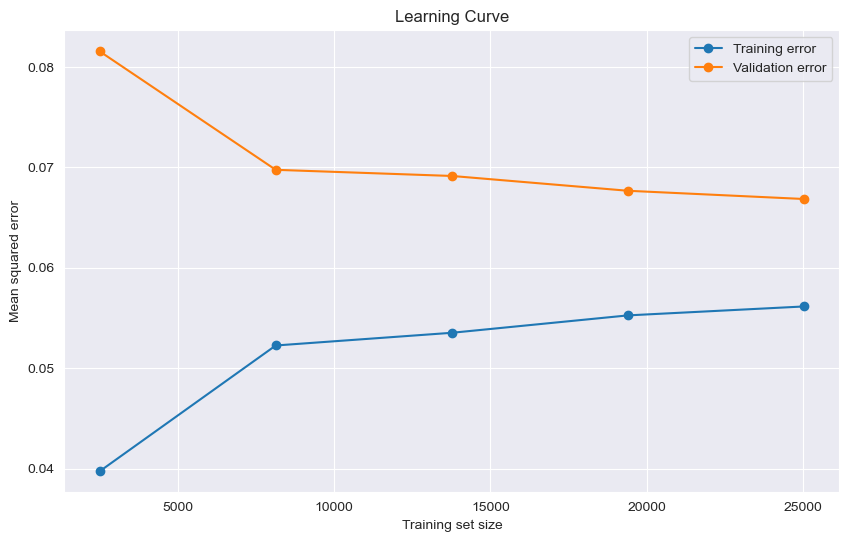

Training set sizes: [ 2503  8135 13768 19400 25033]
Mean Squared Error (Training): [0.03975878 0.05228266 0.05354688 0.05527857 0.05616789]
Mean Squared Error (Validation): [0.08156087 0.06976699 0.0691548  0.06768082 0.06686131]


In [27]:
"""
Random Forest
"""

# Plot the learning curve for your Random Forest regressor model
plot_learning_curve(best_rf_regressor, X_train_1, y_train_1)

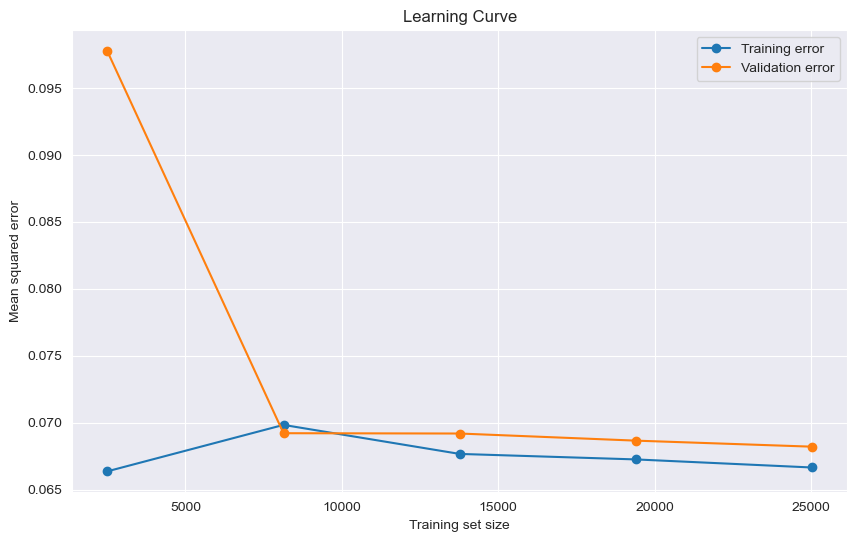

Training set sizes: [ 2503  8135 13768 19400 25033]
Mean Squared Error (Training): [0.06637493 0.06984119 0.06767452 0.06726354 0.06666   ]
Mean Squared Error (Validation): [0.09774273 0.06922104 0.06919765 0.06866649 0.06821561]


In [28]:
"""
Support Vector Machine
"""

# Plot the learning curve for the SVM regressor
plot_learning_curve(best_svm_regressor, X_train_1, y_train_1)


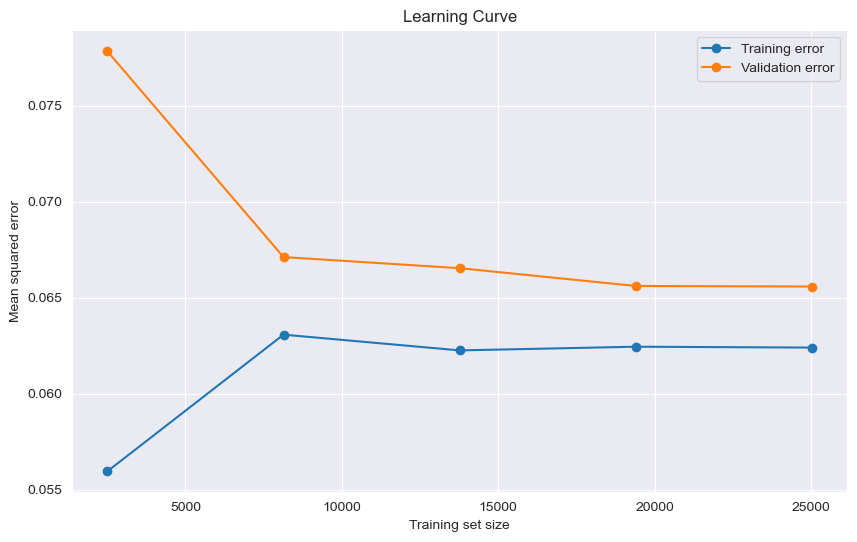

Training set sizes: [ 2503  8135 13768 19400 25033]
Mean Squared Error (Training): [0.05596392 0.0630838  0.06226302 0.06245551 0.06240979]
Mean Squared Error (Validation): [0.07784447 0.06712585 0.06654678 0.06561974 0.06559095]


In [29]:
"""
XGBoost
"""

# Plot the learning curve for the XGBoost regressor
plot_learning_curve(best_xgb_model, X_train_1, y_train_1)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 521
[LightGBM] [Info] Number of data points in the train set: 2503, number of used features: 7
[LightGBM] [Info] Start training from score 0.466363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

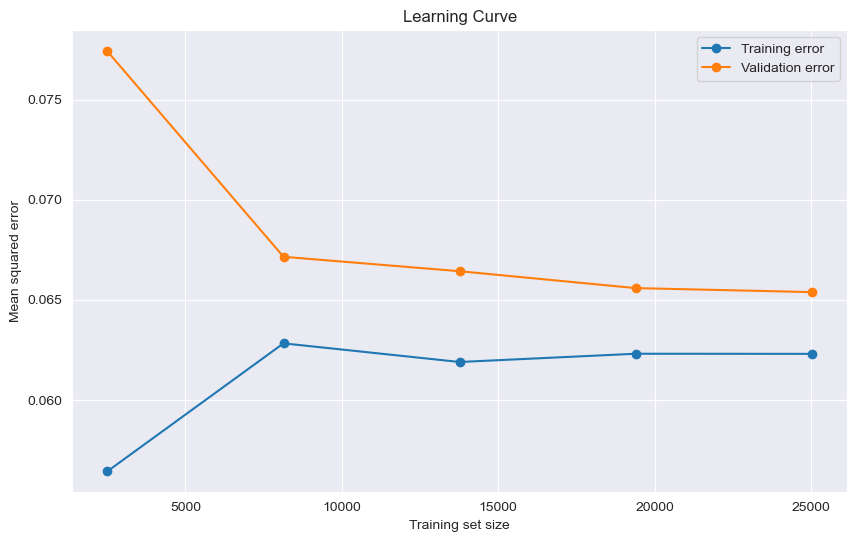

Training set sizes: [ 2503  8135 13768 19400 25033]
Mean Squared Error (Training): [0.05644487 0.06283174 0.06190107 0.06231346 0.06230756]
Mean Squared Error (Validation): [0.07740745 0.06715219 0.0664319  0.0655888  0.06538946]


In [30]:
"""
LightGBM
"""

# Plot the learning curve for the LightGBM regressor
plot_learning_curve(best_lgbm_model, X_train_1, y_train_1)

# model dump

In [34]:
import joblib

# Save the model to a file
joblib.dump(best_svm_regressor, 'model.pkl')

['model.pkl']

In [41]:
df = pd.read_csv('data_prep_bin_traffic.csv')
scaler2 = MinMaxScaler(feature_range=(0, 1))
traffic_volume = df['traffic_volume']

# Reshape the traffic_volume Series into a DataFrame with a single column
traffic_volume_df = pd.DataFrame(traffic_volume)

# Fit and transform the traffic volume DataFrame
scaled_traffic_volume = scaler2.fit_transform(traffic_volume_df)

In [45]:
# Make prediction
prediction_value = model.predict(input_data)

traffic_volume = scaler2.inverse_transform(np.array([]).reshape(-1, 1))
traffic_volume

array([[7280.]])